In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# %matplotlib inline # plot in cell
from sklearn import metrics
import pandas as pd
from scipy import signal
from scipy import stats

import os
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# for svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

In [2]:
import pandas as pd

data = pd.read_excel(r'F:\Program\OneDrive\TLNC\ISI\data\data.xlsx')
data.columns
data

Index(['Person', 'State', 'x', 'y', 'z'], dtype='object')

,Person,State,x,y,z
0,33.0,Jogging,-0.694638,12.680544,0.503953
1,33.0,Jogging,5.012288,11.264028,0.953424
2,33.0,Jogging,4.903325,10.882658,-0.081722
3,33.0,Jogging,-0.612916,18.496431,3.023717
4,33.0,Jogging,-1.184970,12.108489,7.205164
...,...,...,...,...,...
1048570,7.0,Standing,-8.080000,5.090000,-0.690000
1048571,7.0,Standing,-8.120000,5.520000,-0.800000
1048572,7.0,Standing,-7.890000,5.790000,-0.720000
1048573,7.0,Standing,-7.890000,5.980000,-0.270000


In [3]:
G = 9.81
data['x'] = data['x'].div(G)
data['y'] = data['y'].div(G)
data['z'] = data['z'].div(G)
data

,Person,State,x,y,z
0,33.0,Jogging,-0.070809,1.292614,0.051371
1,33.0,Jogging,0.510937,1.148219,0.097189
2,33.0,Jogging,0.499829,1.109343,-0.008330
3,33.0,Jogging,-0.062479,1.885467,0.308228
4,33.0,Jogging,-0.120792,1.234301,0.734471
...,...,...,...,...,...
1048570,7.0,Standing,-0.823649,0.518858,-0.070336
1048571,7.0,Standing,-0.827727,0.562691,-0.081549
1048572,7.0,Standing,-0.804281,0.590214,-0.073394
1048573,7.0,Standing,-0.804281,0.609582,-0.027523


In [4]:
data = data.drop(columns = 'Person')
df = data.groupby(['State'])
df.first()

,x,y,z
State,,,
Downstairs,-0.004165,0.508160,0.663662
Jogging,-0.070809,1.292614,0.051371
Sitting,0.265036,0.984709,0.105520
Standing,-0.191641,1.004077,-0.023603
Upstairs,1.031592,0.441516,-0.385979
Walking,0.086082,0.816388,0.284625


data.drop(['Unnamed: 4','Unnamed: 5','Unnamed: 6','Unnamed: 7', 'Unnamed: 8'], axis='columns', inplace=True)

data.columns =['State', 'x', 'y', 'z'] data

In [5]:
Downstairs = df.get_group(('Downstairs'))
Jogging = df.get_group(('Jogging'))
Sitting = df.get_group(('Sitting'))
Standing = df.get_group(('Standing'))
Upstairs = df.get_group(('Upstairs'))
Walking = df.get_group(('Walking'))

len(Downstairs)
len(Jogging)
len(Sitting)
len(Standing)
len(Upstairs)
len(Walking)

97813

325975

54876

44541

118589

406776

In [6]:
Standing.isnull().sum().sum()
Walking.isnull().sum().sum()
Sitting.isnull().sum().sum()
Jogging.isnull().sum().sum()
Upstairs.isnull().sum().sum()
Downstairs.isnull().sum().sum()


0

1

0

0

0

0

In [7]:
#Check nan value & remove 
len(Walking.index)

Walking = Walking.dropna()
Walking.index = pd.RangeIndex(len(Walking.index))
len(Walking.index)
Walking.isnull().sum().sum()

type(Walking)

406776

406775

0

pandas.core.frame.DataFrame

%% Kalman filter
err_measure=0.01;
err_estimate(1,1)=1;
current_estimate(1,1)=Pressure(1,1);
q=0.01;

steps=length(Pressure);
Az_running=Pressure;
for i =2:steps          %start @ time=2 
      
  kalman_gain(i,1) = err_estimate(i-1,1)./(err_estimate(i-1,1) + err_measure);% Kalman's gain
  mea=Pressure;
  
  current_estimate(i,1) = current_estimate(i-1,1) + kalman_gain(i,1)*(mea(i,1) - current_estimate(i-1,1));
  err_estimate(i,1) = (1.0 - kalman_gain(i,1))*err_estimate(i-1,1) + abs(current_estimate(i-1,1)-current_estimate(i,1))*q;
%   last_estimate = current_estimate;
end  

hold on;

from scipy.signal import butter,filtfilt
import matplotlib.pyplot as plt

fs = 20     
cutoff = 4    
order = 3

def butter_lowpass_filter(data, cutoff, fs, order):
    nyq = 0.5 * fs # Nyquist Frequency
    normal_cutoff = cutoff / nyq
     
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a,data)
    return y

samples = range(0,len(STD))
std_xf = butter_lowpass_filter(STD['x'], cutoff, fs, order)
std_yf = butter_lowpass_filter(STD['y'], cutoff, fs, order)
std_zf = butter_lowpass_filter(STD['z'], cutoff, fs, order)
Standing = pd.DataFrame({'x': std_xf, 'y': std_yf, 'z': std_zf})

samples = range(0,len(WAL))
wal_xf = butter_lowpass_filter(WAL['x'], cutoff, fs, order)
wal_yf = butter_lowpass_filter(WAL['y'], cutoff, fs, order)
wal_zf = butter_lowpass_filter(WAL['z'], cutoff, fs, order)
Walking = pd.DataFrame({'x': wal_xf, 'y': wal_yf, 'z': wal_zf})

                                 
samples = range(0,len(SIT))
sit_xf = butter_lowpass_filter(SIT['x'], cutoff, fs, order)
sit_yf = butter_lowpass_filter(SIT['y'], cutoff, fs, order)
sit_zf = butter_lowpass_filter(SIT['z'], cutoff, fs, order)
Sitting  = pd.DataFrame({'x': sit_xf, 'y': sit_yf, 'z': sit_zf})

samples = range(0,len(JOG))
jog_xf = butter_lowpass_filter(JOG['x'], cutoff, fs, order)
jog_yf = butter_lowpass_filter(JOG['y'], cutoff, fs, order)
jog_zf = butter_lowpass_filter(JOG['z'], cutoff, fs, order)
Jogging = pd.DataFrame({'x': jog_xf, 'y': jog_yf, 'z': jog_zf})

samples = range(0,len(STU))
up_xf = butter_lowpass_filter(STU['x'], cutoff, fs, order)
up_yf = butter_lowpass_filter(STU['y'], cutoff, fs, order)
up_zf = butter_lowpass_filter(STU['z'], cutoff, fs, order)
Upstairs = pd.DataFrame({'x': up_xf, 'y': up_yf, 'z': up_zf})

samples = range(0,len(STN))
down_xf = butter_lowpass_filter(STN['x'], cutoff, fs, order)
down_yf = butter_lowpass_filter(STN['y'], cutoff, fs, order)
down_zf = butter_lowpass_filter(STN['z'], cutoff, fs, order)
Downstairs = pd.DataFrame({'x': down_xf, 'y': down_yf, 'z': down_zf})


In [8]:
# Split dataset to 2 parts: Train (60%) - Test (40%)\n",
# 200 samples/frame

window_size = 200
stride = 100 #step

# range (start, stop, step)
X_stand_train = [Standing[i:i+window_size] for i in range(0, int(len(Standing)*0.6), stride)] 
X_stand_test = [Standing[i:i+window_size] for i in range(int(len(Standing)*0.6), len(Standing), stride) 
                                            if i+window_size<=len(Standing)]

X_walk_train = [Walking[i:i+window_size] for i in range(0, int(len(Walking)*0.6), stride)]
X_walk_test = [Walking[i:i+window_size] for i in range(int(len(Walking)*0.6), len(Walking),stride)
                                           if i+window_size<=len(Walking)]

X_sit_train = [Sitting[i:i+window_size] for i in range(0, int(len(Sitting)*0.6), stride)]
X_sit_test = [Sitting[i:i+window_size] for i in range(int(len(Sitting)*0.6), len(Sitting),stride)
                                           if i+window_size<=len(Sitting)]

X_jog_train = [Jogging[i:i+window_size] for i in range(0, int(len(Jogging)*0.6), stride)] 
X_jog_test = [Jogging[i:i+window_size] for i in range(int(len(Jogging)*0.6), len(Jogging), stride) 
                                            if i+window_size<=len(Jogging)]

X_up_train = [Upstairs[i:i+window_size] for i in range(0, int(len(Upstairs)*0.6), stride)] 
X_up_test = [Upstairs[i:i+window_size] for i in range(int(len(Upstairs)*0.6), len(Upstairs), stride) 
                                            if i+window_size<=len(Upstairs)]

X_down_train = [Downstairs[i:i+window_size] for i in range(0, int(len(Downstairs)*0.6), stride)] 
X_down_test = [Downstairs[i:i+window_size] for i in range(int(len(Downstairs)*0.6), len(Downstairs), stride) 
                                            if i+window_size<=len(Downstairs)]

print ('X_stand_train: ', len(X_stand_train))
print ('X_stand_test: ', len(X_stand_test))

print ('X_walk_train: ', len(X_walk_train))
print ('X_walk_test: ', len(X_walk_test))

print ('X_sit_train: ', len(X_sit_train))
print ('X_sit_test: ', len(X_sit_test))

print ('X_jog_train: ', len(X_jog_train))
print ('X_jog_test: ', len(X_jog_test))

print ('X_up_train: ', len(X_up_train))
print ('X_up_test: ', len(X_up_test))

print ('X_down_train: ', len(X_down_train))
print ('X_down_test: ', len(X_down_test))



X_stand_train:  268
X_stand_test:  177
X_walk_train:  2441
X_walk_test:  1626
X_sit_train:  330
X_sit_test:  218
X_jog_train:  1956
X_jog_test:  1302
X_up_train:  712
X_up_test:  473
X_down_train:  587
X_down_test:  390


In [9]:
train_data = []
train_label = []

test_data = []
test_label = []

for acts in X_stand_train:
    train_data.append(acts)
    train_label.append(0)
    
for acts in X_walk_train:
    train_data.append(acts)
    train_label.append(1)

for acts in X_sit_train:
    train_data.append(acts)
    train_label.append(2)
    
for acts in X_jog_train:
    train_data.append(acts)
    train_label.append(3)

for acts in X_up_train:
    train_data.append(acts)
    train_label.append(4)

for acts in X_down_train:
    train_data.append(acts)
    train_label.append(5)


print('train-data length: ', len(train_data) )
print('train-label length: ', len(train_label) )
#print(train_label)
      
# For TEST

for acts in X_stand_test:
    test_data.append(acts)
    test_label.append(0)

for acts in X_walk_test:
    test_data.append(acts)
    test_label.append(1)

for acts in X_sit_test:
    test_data.append(acts)
    test_label.append(2)
        
for acts in X_jog_test:
    test_data.append(acts)
    test_label.append(3)

for acts in X_up_test:
    test_data.append(acts)
    test_label.append(4)

for acts in X_down_test:
    test_data.append(acts)
    test_label.append(5)

print('test-data length: ', len(test_data))
print('test-label length: ', len(test_label))

train-data length:  6294
train-label length:  6294
test-data length:  4186
test-label length:  4186


In [10]:
def diffState(x,y,z):
    result = 0
    for i,j,k in zip(x,y,z):
        summ = pow((i-np.mean(x)),2)+pow((j-np.mean(y)),2)+pow((k-np.mean(z)),2)
        result = result + summ
    return np.sqrt(result)

def featuresFromBuffer(at):
    feat = np.zeros(16)    # return array float([ 0.,  0.,  0.,  0., ....., 0.])
                            # a vector of 21 features from each window
    x = np.array(at.iloc[:,0], dtype=np.float64)   
    y = np.array(at.iloc[:,1], dtype=np.float64)   
    z = np.array(at.iloc[:,2], dtype=np.float64)  
    
    means = [np.mean(i) for i in [x, y, z]]
    feat[0:3] = means 
    
    rms = [np.sqrt(np.mean(i**2)) for i in [x, y, z]]
    feat[3:6] = rms

    # Standard deviation
    std = [np.std(i) for i in [x, y, z]]
    feat[6:9] = std

    # Median
    med = [np.median(i) for i in [x, y, z]]
    feat[9:12] = med
    
    # Range
    Range = [np.amax(i)-np.amin(i) for i in [x, y, z]]    
    feat[12:15] = Range
    
    feat[15] = diffState(x,y,z)
    
    return feat  

In [11]:

# Tạo mảng features 

train_features = []
test_features = []
for action in train_data:
    feat = featuresFromBuffer(action)
    train_features.append(feat)  

for action in test_data:
    feat = featuresFromBuffer(action)
    test_features.append(feat)

len(train_features)
len(test_features)

#train_features

6294

4186

np.where(np.isnan(new_train)) 
new_train = [row for row in new_train if not np.isnan(row).any()]
len(new_train)

np.where(np.isnan(test_features))

In [12]:
#lower accuracy (nan value -> 0)
np.where(np.isnan(train_features)) 
train_features = np.nan_to_num(train_features)
np.where(np.isnan(test_features))
test_features = np.nan_to_num(test_features)      

len(train_features)
len(train_label)

(array([], dtype=int64), array([], dtype=int64))

(array([], dtype=int64), array([], dtype=int64))

6294

6294

In [13]:
#Classifier 

from sklearn.feature_selection import SelectFromModel
print("Gradient Boosting Decision Tree:")
from sklearn.ensemble import GradientBoostingClassifier
clf1 = GradientBoostingClassifier(learning_rate=0.05,max_depth=3,n_estimators=100).fit(train_features, train_label)
#format: pass score in {:.3f}
print('Accuracy of GBDT classifier on training set: {:.3f}'
     .format(clf1.score(train_features, train_label)))
print('Accuracy of GBDT classifier on test set: {:.3f}'
     .format(clf1.score(test_features, test_label)))

print("\n\nDecision Tree:") 
from sklearn.tree import DecisionTreeClassifier
from adspy_shared_utilities import plot_decision_tree 

clf2 = DecisionTreeClassifier(max_depth=4).fit(train_features, train_label)

print('Accuracy of Decision Tree classifier on training set: {:.3f}'.format(clf2.score(train_features, train_label)))
print('Accuracy of Decision Tree classifier on test set: {:.3f}'
.format(clf2.score(test_features, test_label)))


print("\n\nSVM:")
clf3 = SVC(C=100, gamma='scale').fit(train_features, train_label)
print("Accuracy on training set: {:.2f}".format(clf3.score(train_features, train_label)))
print("Accuracy on test set: {:.2f}".format(clf3.score(test_features, test_label)))


print('\n\n Random Forests: ')
from sklearn.ensemble import RandomForestClassifier
clf4 = RandomForestClassifier(n_estimators=200, random_state=0).fit(train_features, train_label)

print('Accuracy of RF classifier on training set: {:.3f}'
     .format(clf4.score(train_features, train_label)))
print('Accuracy of RF classifier on test set: {:.3f}'
     .format(clf4.score(test_features, test_label)))


print('\n\n KNeighbor: ')
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5, weights = 'distance').fit(train_features, train_label)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(train_features, train_label)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(test_features, test_label)))


Gradient Boosting Decision Tree:
Accuracy of GBDT classifier on training set: 0.962
Accuracy of GBDT classifier on test set: 0.790


Decision Tree:
Accuracy of Decision Tree classifier on training set: 0.842
Accuracy of Decision Tree classifier on test set: 0.715


SVM:
Accuracy on training set: 0.91
Accuracy on test set: 0.78


 Random Forests: 
Accuracy of RF classifier on training set: 1.000
Accuracy of RF classifier on test set: 0.758


 KNeighbor: 
Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 0.73


<Figure size 560x400 with 0 Axes>

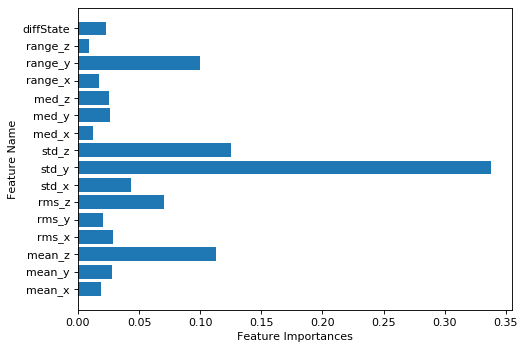

Feature importances: [0.01861231 0.02757433 0.11327025 0.0291025  0.0201786  0.07014959
 0.04348706 0.33791548 0.12552523 0.0126437  0.02612704 0.02521112
 0.01732109 0.10004697 0.00947478 0.02335995]


In [14]:
# adspy_shared_utilities import plot_feature_importances
# Atturibute Feature importances only use for classifiers contain trees

feature_names = ['mean_x', 'mean_y', 'mean_z', 
                'rms_x', 'rms_y', 'rms_z',
                'std_x', 'std_y', 'std_z',
                'med_x', 'med_y', 'med_z',
                'range_x','range_y','range_z','diffState']

def plot_feature_importances(clf, feature_names):
    c_features = len(feature_names)
    plt.barh(range(c_features), clf.feature_importances_)
    plt.xlabel("Feature Importances")
    plt.ylabel("Feature Name")
    plt.yticks(np.arange(c_features), feature_names)
    
plt.figure(figsize=(7,5), dpi=80)
plot_feature_importances(clf1, feature_names)
plt.show()

print('Feature importances: {}'.format(clf1.feature_importances_))

In [15]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
      
y_pred = clf1.predict(test_features)
f1_score(test_label, y_pred, average='macro')
recall_score(test_label, y_pred, average='macro')
precision_score(test_label, y_pred, average='macro',labels=np.unique(y_pred))

f1_score(test_label, y_pred, average='micro')
recall_score(test_label, y_pred, average='micro')
precision_score(test_label, y_pred, average='micro',labels=np.unique(y_pred))

0.7405012835158549

0.7257675476039308

0.7736007709839461

0.7904921165790731

0.7904921165790731

0.7904921165790731

set(test_label) - set(y_pred) #=> warning in precision due to test_label disappear in y_pred
# fix = add "labels=np.unique(y_pred)" in #metrics.f1_score(y_test, y_pred, labels=np.unique(y_pred))

1

Confusion matrix, without normalization
[[ 133    5   37    0    2    0]
 [   2 1304    0  149  169    2]
 [   5    2  206    0    5    0]
 [   0   95    0 1080  126    1]
 [   4  150    0   46  267    6]
 [   6  181    0    3  195    5]]
Normalized confusion matrix
[[7.51e-01 2.82e-02 2.09e-01 0.00e+00 1.13e-02 0.00e+00]
 [1.23e-03 8.02e-01 0.00e+00 9.16e-02 1.04e-01 1.23e-03]
 [2.29e-02 9.17e-03 9.45e-01 0.00e+00 2.29e-02 0.00e+00]
 [0.00e+00 7.30e-02 0.00e+00 8.29e-01 9.68e-02 7.68e-04]
 [8.46e-03 3.17e-01 0.00e+00 9.73e-02 5.64e-01 1.27e-02]
 [1.54e-02 4.64e-01 0.00e+00 7.69e-03 5.00e-01 1.28e-02]]


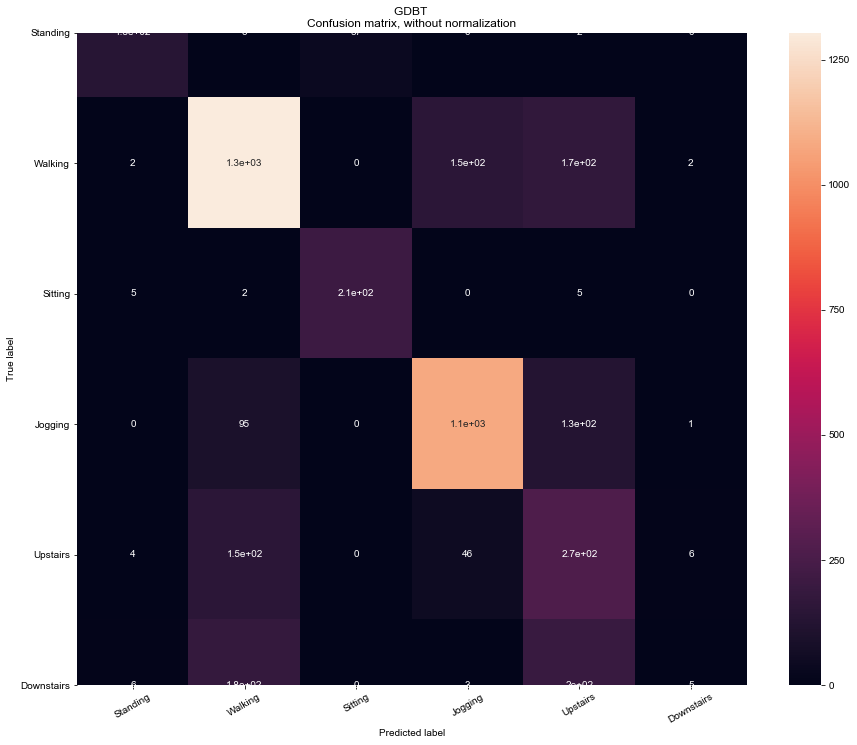

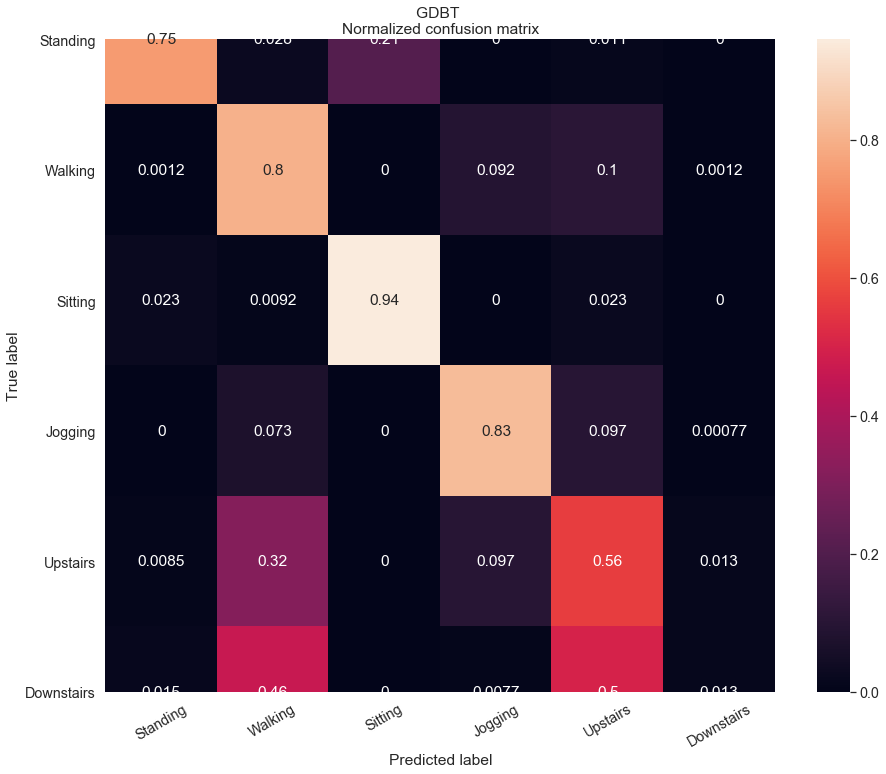


Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.75      0.81       177
           1       0.75      0.80      0.78      1626
           2       0.85      0.94      0.89       218
           3       0.85      0.83      0.84      1302
           4       0.35      0.56      0.43       473
           5       0.36      0.01      0.02       390

    accuracy                           0.72      4186
   macro avg       0.67      0.65      0.63      4186
weighted avg       0.71      0.72      0.69      4186



In [16]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sb
from sklearn.utils.multiclass import unique_labels

target_names = ['Standing', 'Walking', 'Sitting', 'Jogging','Upstairs', 'Downstairs']

y_pred = clf2.predict(test_features)
lables = np.concatenate([target_names, ])
1

from sklearn.metrics import f1_score

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False, title=None):
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    #metrics.f1_score(y_test, y_pred, labels=np.unique(y_pred))
    
    fig, ax = plt.subplots(figsize = (15,12))
    #Create a 2-dim array include: rows, columns, data
    dataFrame = pd.DataFrame(cm)
    #create a heatmap, annot = True: add text on each cell over heatmap
    sb.heatmap(dataFrame, annot = True)  
    ax.set(xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30)

    sb.set(font_scale = 1.3)

np.set_printoptions(precision=2) #lam tron

plot_confusion_matrix(test_label, y_pred, classes=lables,  
        title='GDBT \nConfusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(test_label, y_pred, classes=lables, normalize=True,
        title='GDBT \nNormalized confusion matrix')

plt.show()
print ("\nClassification Report: ")
print (classification_report(test_label, y_pred,labels=np.unique(y_pred)))


6


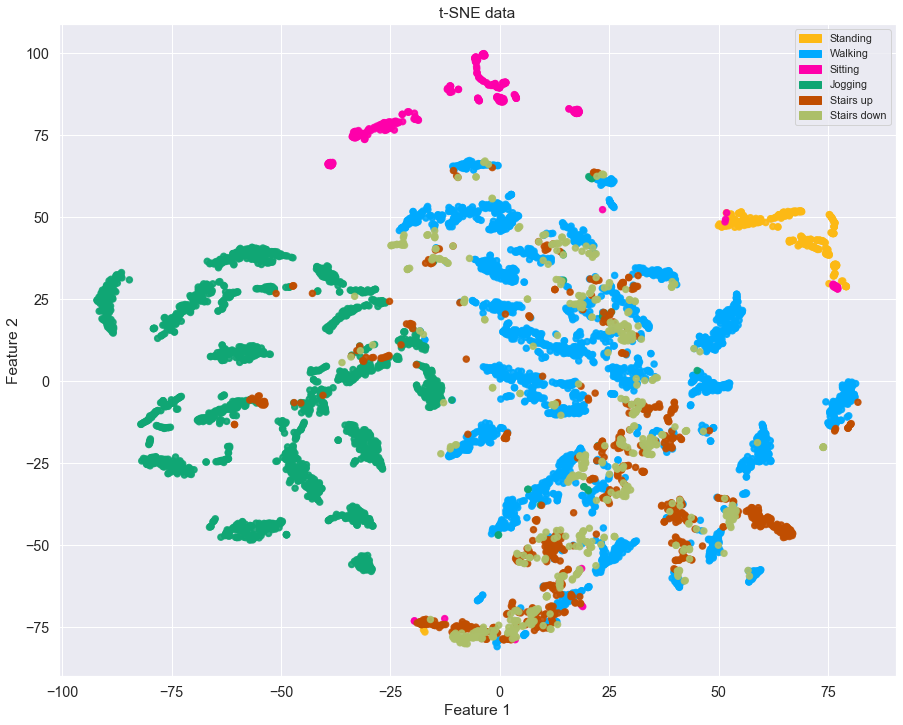

In [17]:
# t-SNE

import numpy
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
from sklearn import neighbors
import graphviz 
from sklearn.tree import export_graphviz
import matplotlib.patches as mpatches


def plot_labelled_scatter(X, y, class_labels): 
    num_labels = len(class_labels)
    print(num_labels)

    # create a mesh (lưới) to plot the boundaries (đường biên)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1   
                    # X[row, column]
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1  
    
    colors = ['#fdb915', '#00AAFF', '#FF00AA','#10a674', '#c04e01', '#acbf69'] 
  
    cmap = ListedColormap(colors) 
    
   # Generate a colormap index based on discrete intervals
    norm = BoundaryNorm(numpy.arange(0, num_labels+1, 1), ncolors=num_labels) 
    
    plt.figure(figsize=(15, 12))  # độ dài row & column của 
    
    plt.scatter(X[:, 0], X[:, 1], s=30, c=y, cmap=cmap, norm=norm, alpha=0.9, lw=2)
                #edgecolor='black'
    
    # Create array h[] chứa chú thích behaviors & colors tương ứng
    h = []
    for c in range(0, num_labels):
        # tạo chú thích = mpatches.Patch
        h.append(mpatches.Patch(color=colors[c], label=class_labels[c])) 
    plt.legend(handles=h, fontsize = 'x-small') # show ghi chu
    
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('t-SNE data')

    plt.show()
    
X_visual = train_features
y_visual = np.array(train_label, dtype=np.uint8) 

n_samples = 300
n_components = 2  # dimension
perplexity = 30.0 # number of NEAREST NEIGHBORS that used in other MALIFOLD LEARNING algorithm (value: 5-50)
RS = 1000   

from sklearn.manifold import TSNE
# fit X_visual into embedding space in low-dimensional space and return  array (n_samples, n_components) 
X_tsne = TSNE(random_state=RS, n_components=2, perplexity=30.0, learning_rate=300.0 ).fit_transform(X_visual)
#  , n_components=2, perplexity=30.0, learning_rate=300.0             
plot_labelled_scatter(X_tsne, y_visual,['Standing','Walking','Sitting','Jogging','Stairs up','Stairs down'])

# instead train_features -> train_data to plot tsne

len(train_data) = len(train_label) = 78646
train_features.shape = (78646,18)
type(train_data): list
type(train_features)#: numpy.ndarray

train = np.array(train_data)
train_data[0].shape
u = np.array(train_data[1])

In [18]:
x = train_data

train_data[1]
type(train_data[1])
n = np.array(train_data[1])
train = []

m = np.concatenate((n,np.array(train_data[2])))
l = np.concatenate((m,np.array(train_data[3])))
l
for i in range (1):
    new = np.array(train_data[i])
    #train = np.concatenate((train, new))
    train = np.concatenate((train,new))
train


,x,y,z
223532,0.100917,0.990826,-0.163833
223533,0.070336,0.995923,-0.163833
223534,0.042813,1.050968,-0.163833
223535,-0.004077,1.027523,-0.191601
223536,0.011213,0.965341,-0.167998
...,...,...,...
223727,0.120285,1.004077,-0.144395
223728,0.094801,1.008155,-0.120792
223729,0.073394,1.023445,-0.129123
223730,0.066259,1.027523,-0.120792


pandas.core.frame.DataFrame

array([[ 0.1 ,  0.99, -0.16],
       [ 0.07,  1.  , -0.16],
       [ 0.04,  1.05, -0.16],
       ...,
       [ 0.14,  1.  , -0.1 ],
       [ 0.1 ,  1.  , -0.09],
       [ 0.04,  1.03, -0.1 ]])

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 2 dimension(s)

In [ ]:
type(new_train)
new_train.shape

In [ ]:
#new_train = np.resize(new_train,((78646, 18)))
new_train = np.resize(new_train,(train_features.shape))



In [ ]:
# t-SNE orginal data

import numpy
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
from sklearn import neighbors
import graphviz 
from sklearn.tree import export_graphviz
import matplotlib.patches as mpatches


def plot_labelled_scatter(X, y, class_labels): 
    num_labels = len(class_labels)
    print(num_labels)

    # create a mesh (lưới) to plot the boundaries (đường biên)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1   # min & max for feature 1 ((column 0)) 
                    # X[row, column]
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1   # min & max for feature 2 (column 1)
    
    colors = ['#fdb915', '#00AAFF', '#FF00AA',  #'#ff0000', 
              '#10a674', '#c04e01', '#acbf69'] 
  
    cmap = ListedColormap(colors) 
    
   # Generate a colormap index based on discrete intervals
    norm = BoundaryNorm(numpy.arange(0, num_labels+1, 1), ncolors=num_labels) 
    
    plt.figure(figsize=(15, 12))  # độ dài row & column của 
    
    plt.scatter(X[:, 0], X[:, 1], s=30, c=y, cmap=cmap, norm=norm, alpha=0.3, lw=1)
                #edgecolor='black'
    
    # Create array h[] chứa chú thích behaviors & colors tương ứng
    h = []
    for c in range(0, num_labels):
        # tạo chú thích = mpatches.Patch
        h.append(mpatches.Patch(color=colors[c], label=class_labels[c])) 
    plt.legend(handles=h, fontsize = 'x-small') # show ghi chu
    
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('t-SNE data')

    plt.show()
    
X_orginal = new_train
y_orginal = np.array(train_label, dtype=np.uint8) 

n_samples = 300
n_components = 2  # dimension
perplexity = 30.0 
RS = 1000   

from sklearn.manifold import TSNE 
X_tsne = TSNE(random_state=RS, n_components=2, perplexity=30.0, learning_rate=300.0 ).fit_transform(X_orginal)         
plot_labelled_scatter(X_tsne, y_visual,['Jogging','Walking','Stairs up','Stairs down','Sitting','Standing'])

In [ ]:
type(train_features)
train_features.shape

In [ ]:
x = ['6s','12s','16s','18s','20s']
y1 = [69.3, 72.2, 73.9, 74.6, 74]
y2 = [66.1, 71.2, 71, 71, 68]
y3 = [66, 71, 72, 73, 73]
y4 = [66.8, 71, 72.4, 72.6, 72.1]
y5 = [61, 68, 69, 70, 70]

plt.figure(figsize=(12, 7))
plt.plot(x,y1, marker='o', linestyle='--', color='r',lw = 3,label='GBDT')

plt.plot(x,y2, marker='*', linestyle='-', color='g',lw = 3, label='DT')

plt.plot(x,y3, marker='+', linestyle=':', color='k',lw = 3, label='SVM')

plt.plot(x,y4, marker='.', linestyle='-.', color='m',lw = 3, label='RF')

plt.plot(x,y5, marker='^', linestyle='-', color='c',lw = 3,label='KNN')

plt.legend(['GBDT', 'DT','SVM','RF','KNN'],loc='best')
plt.ylim([60, 80])
plt.xlabel('Window size (s)')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy')
plt.grid(alpha=0.75)

In [ ]:
x = ['6s','12s','16s','18s','20s']
y1 = [58.8, 66.2, 68, 68.8, 69.8]
y2 = [56.5, 62.3, 63.8, 64.5, 65]
y3 = [57.2, 65.2, 68.5, 70, 71.2]
y4 = [57.8, 67.2, 69.7, 70.5, 70.7]
y5 = [52.3, 62, 63.8, 64.5, 67.5]

plt.figure(figsize=(12, 7))
plt.plot(x,y1, marker='o', linestyle='--', color='r',lw = 3,label='GBDT')

plt.plot(x,y2, marker='*', linestyle='-', color='g',lw = 3, label='DT')

plt.plot(x,y3, marker='+', linestyle=':', color='k',lw = 3, label='SVM')

plt.plot(x,y4, marker='.', linestyle='-.', color='m',lw = 3, label='RF')

plt.plot(x,y5, marker='^', linestyle=':', color='c',lw = 3,label='KNN')

plt.legend(['GBDT', 'DT','SVM','RF','KNN'],loc='best')
plt.ylim([50, 75])
plt.xlabel('Window size (s)')
plt.ylabel('Recall (%)')
plt.title('Recall')
plt.grid(alpha=0.75)